---
Fuzzy Logic Sugeno
---

In [1]:
# Mengimpor Library
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
# Menentukan Variabel Kasus
Letak = np.arange(0, 120, 1)
Luas = np.arange(0, 120, 1)
Akses = np.arange(0, 110, 1)
Harga = np.arange(0, 350, 1)

In [3]:
# Menentukan Range Himpunan Fuzzy
Letak_tidakstrategis = fuzz.trapmf(Letak, [0, 0, 50, 70])
Letak_strategis = fuzz.trapmf(Letak,[50, 70, 120, 120])

Luas_sempit = fuzz.trapmf(Luas, [0, 0, 40, 80])
Luas_lapang = fuzz.trapmf(Luas, [40, 80, 120, 120])

Akses_susah = fuzz.trapmf(Akses, [0, 0, 40, 70])
Akses_mudah = fuzz.trapmf (Akses, [40, 70, 110, 110])

Harga_rendah = fuzz.trapmf (Harga, [0, 0, 50, 300])
Harga_tinggi = fuzz.trapmf (Harga, [50, 300, 350, 350])

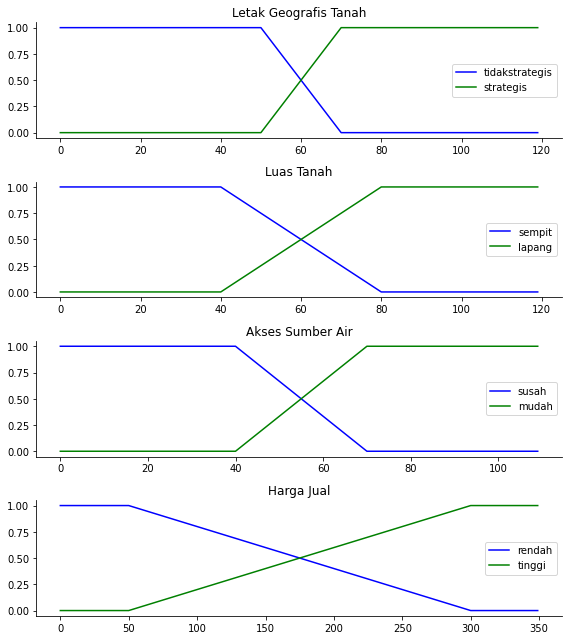

In [4]:
# Membuat Grafik Himpunan Fuzzy
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8,9))

ax0.plot(Letak, Letak_tidakstrategis, 'b', linewidth=1.5, label='tidakstrategis')
ax0.plot(Letak, Letak_strategis, 'g', linewidth=1.5, label='strategis')

ax0.set_title('Letak Geografis Tanah')
ax0.legend()

ax1.plot(Luas, Luas_sempit, 'b', linewidth=1.5, label='sempit')
ax1.plot(Luas, Luas_lapang, 'g', linewidth=1.5, label='lapang')

ax1.set_title('Luas Tanah')
ax1.legend()

ax2.plot(Akses, Akses_susah, 'b', linewidth=1.5, label='susah')
ax2.plot(Akses, Akses_mudah, 'g', linewidth=1.5, label='mudah')

ax2.set_title('Akses Sumber Air')
ax2.legend()

ax3.plot(Harga, Harga_rendah, 'b', linewidth=1.5, label='rendah')
ax3.plot(Harga, Harga_tinggi, 'g', linewidth=1.5, label='tinggi')

ax3.set_title('Harga Jual')
ax3.legend()

for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()

In [17]:
# Mengimput Nilai Kasus
Let = 100
Lu = 100
Aks = 100

In [18]:
# Menentukan Rule Base
"""
•R1, Jika Letak Geografis tidak strategis, Luas Tanah sempit AND Akses Sumber Air susah maka Harga Jual rendah
•R2, Jika Letak Geografis tidak strategis, Luas Tanah sempit AND Akses Sumber Air mudah maka Harga Jual rendah
•R3, Jika Letak Geografis tidak strategis, Luas Tanah lapang AND Akses Sumber Air susah maka Harga Jual rendah
•R4, Jika Letak Geografis tidak strategis, Luas Tanah lapang AND Akses Sumber Air mudah maka Harga Jual tinggi
•R5, Jika Letak Geografis strategis, Luas Tanah sempit AND Akses Sumber Air susah maka Harga Jual rendah
•R6, Jika Letak Geografis strategis, Luas Tanah sempit AND Akses Sumber Air mudah maka Harga Jual tinggi
•R7, Jika Letak Geografis strategis, Luas Tanah lapang AND Akses Sumber Air susah maka Harga Jual tinggi
•R8, Jika Letak Geografis strategis, Luas Tanah lapang AND Akses Sumber Air mudah maka Harga Jual tinggi

Domain Harga Jual:
RENDAH --> (300-Z)/(300-50) = fmin; apred[i] = fmin; (300 - Z) = 250 * apred[i]; Z = 300 - (250 * apred[i])
TINGGI --> (Z-50)/(300-50) = fmin; apred[i] = fmin; (Z - 50) = 250 * apred[i]; Z = (250 * apred[i]) + 50
""";

In [19]:
# Menentukan Derajat Keanggotaan
a = []
a.append(fuzz.interp_membership(Letak, Letak_tidakstrategis, Let))
a.append(fuzz.interp_membership(Letak, Letak_strategis, Let))

b = []
b.append(fuzz.interp_membership(Luas, Luas_sempit, Lu))
b.append(fuzz.interp_membership(Luas, Luas_lapang, Lu))

c = []
c.append(fuzz.interp_membership(Akses, Akses_susah, Aks))
c.append(fuzz.interp_membership(Akses, Akses_mudah, Aks))

print("Derajat Keanggotaan Letak Geografis Tanah")
if a[0] > 0:
    print("tidakstrategis: "+str(a[0]))
if a[1] > 0:
    print("strategis: "+str(a[1]))

print("Derajat Keanggotaan Luas Tanah")
if b[0] > 0:
    print("sempit: "+str(b[0]))
if b[1] > 0:
    print("lapang: "+str(b[1]))

print("Derajat Keanggotaan Akses Sumber Air")
if c[0] > 0:
    print("susah: "+str(c[0]))
if c[1] > 0:
    print("mudah: "+str(c[1]))

Derajat Keanggotaan Letak Geografis Tanah
strategis: 1.0
Derajat Keanggotaan Luas Tanah
lapang: 1.0
Derajat Keanggotaan Akses Sumber Air
mudah: 1.0


# Memodelkan Rule Base dan Inferensi Tsukamoto
•R1, Jika Letak Geografis tidak strategis, Luas Tanah sempit AND Akses Sumber Air susah maka Harga Jual = 1 * Luas Tanah + 1 * Akses Sumber Air + 2
•R2, Jika Letak Geografis tidak strategis, Luas Tanah sempit AND Akses Sumber Air mudah maka Harga Jual = 1 * Luas Tanah + 1 * Akses Sumber Air + 2
•R3, Jika Letak Geografis tidak strategis, Luas Tanah lapang AND Akses Sumber Air susah maka Harga Jual = 1 * Luas Tanah + 1 * Akses Sumber Air + 2
•R4, Jika Letak Geografis tidak strategis, Luas Tanah lapang AND Akses Sumber Air mudah maka Harga Jual = Luas Tanah + 2 Akses Sumber Air
•R5, Jika Letak Geografis strategis, Luas Tanah sempit AND Akses Sumber Air susah maka Harga Jual = 1 * Luas Tanah + 1 * Akses Sumber Air + 2
•R6, Jika Letak Geografis strategis, Luas Tanah sempit AND Akses Sumber Air mudah maka Harga Jual = Luas Tanah + 2 Akses Sumber Air
•R7, Jika Letak Geografis strategis, Luas Tanah lapang AND Akses Sumber Air susah maka Harga Jual = Luas Tanah + 2 Akses Sumber Air
•R8, Jika Letak Geografis strategis, Luas Tanah lapang AND Akses Sumber Air mudah maka Harga Jual = Luas Tanah + 2 Akses Sumber Air

Domain Harga Jual:
RENDAH --> Z = 1 * Lu + 1 * Aks + 2
TINGGI --> Z = Lu + 2 * Aks

In [20]:
# Memodelkan Rule Base dan Inferensi Tsukamoto

x1 = np.fmin(a[0], b[0])
apred1 = np.fmin(x1, c[0])
print("Rendah, Nilai apred1 = ", apred1)
z1 = 1 * Lu + 1 * Aks + 2
print("Nilai z1 = ", z1)

x2 = np.fmin(a[0], b[0])
apred2 = np.fmin(x2, c[1])
print("Rendah, Nilai apred2 = ", apred2)
z2 = 1 * Lu + 1 * Aks + 2
print("Nilai z2 = ", z2)

x3 = np.fmin(a[0], b[1])
apred3 = np.fmin(x3, c[0])
print("Rendah, Nilai apred3 = ", apred3)
z3 = 1 * Lu + 1 * Aks + 2
print("Nilai z3 = ", z3)

x4 = np.fmin(a[0], b[1])
apred4 = np.fmin(x4, c[1])
print("Tinggi, Nilai apred4 = ", apred4)
z4 = Lu + 2 * Aks
print("Nilai z4 = ", z4)

x5 = np.fmin(a[1], b[0])
apred5 = np.fmin(x5, c[0])
print("Rendah, Nilai apred5 = ", apred5)
z5 = 1 * Lu + 1 * Aks + 2
print("Nilai z5 = ", z5)

x6 = np.fmin(a[1], b[0])
apred6 = np.fmin(x6, c[1])
print("Tinggi, Nilai apred6 = ", apred6)
z6 = Lu + 2 * Aks
print("Nilai z6 = ", z6)

x7 = np.fmin(a[1], b[1])
apred7 = np.fmin(x7, c[0])
print("Tinggi, Nilai apred7 = ", apred7)
z7 = Lu + 2 * Aks
print("Nilai z7 = ", z7)

x8 = np.fmin(a[1], b[1])
apred8 = np.fmin(x8, c[1])
print("Tinggi, Nilai apred8 = ", apred8)
z8 = Lu + 2 * Aks
print("Nilai z8 = ", z8)

Rendah, Nilai apred1 =  0.0
Nilai z1 =  202
Rendah, Nilai apred2 =  0.0
Nilai z2 =  202
Rendah, Nilai apred3 =  0.0
Nilai z3 =  202
Tinggi, Nilai apred4 =  0.0
Nilai z4 =  300
Rendah, Nilai apred5 =  0.0
Nilai z5 =  202
Tinggi, Nilai apred6 =  0.0
Nilai z6 =  300
Tinggi, Nilai apred7 =  0.0
Nilai z7 =  300
Tinggi, Nilai apred8 =  1.0
Nilai z8 =  300


In [21]:
# Defuzzyfikasi
z = (apred1*z1 + apred2*z2 + apred3*z3 + apred4*z4 + apred5*z5 + apred6*z6 + apred7*z7 + apred8*z8)/(apred1 + apred2 + apred3 + apred4 + apred5 + apred6 + apred7 + apred8)

In [22]:
print("Harga Jual Tanah = ", z)

Harga Jual Tanah =  300.0
